# Logistic Regression-simpler

In [1]:
#https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python

In [31]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve


In [3]:
#to load csv
df = pd.read_csv('diabetes.csv')
#Pima Indian Diabetes dataset from Kaggle

### Research question: What factors affect the chances of getting heart diabetes?
##### Y is dependent variable called 'Outcome' where 0 = no diabetes, 1 = yes diabetes
##### X are 7 explanatory variables (did not use 'SkinThickness')

# Data cleaning

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,129,90,7,326,19.6,0.582,60,0
1,12,92,62,7,258,27.6,0.926,44,1
2,1,90,68,8,0,24.5,1.138,36,0
3,1,109,60,8,182,25.4,0.947,21,0
4,1,73,50,10,0,23.0,0.248,21,0


In [5]:
#check to see if any missing data
print(df.shape)
df.isnull().sum()

(539, 9)


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
### Set Y and X variables

In [13]:
independent_var = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
X = df[independent_var] # Independent variables
y = df.Outcome # Dependent variable

# Train Test split

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.20,random_state=0)
print(X_train.shape)
print(X_test.shape)

# Logistic Regression

In [15]:
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#idk what this is
# y_pred=logreg.predict(X_test)

In [40]:
log_odds = logreg.coef_[0]   #put into a dataframe 
pd.DataFrame(log_odds, 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
DiabetesPedigreeFunction,1.212129
Pregnancies,0.093205
BMI,0.087295
Age,0.036515
Glucose,0.033771
Insulin,-0.001024
BloodPressure,-0.010531


In [42]:
# Need to convert log odds coefficient into regular odds
# see more here: https://towardsdatascience.com/interpreting-coefficients-in-linear-and-logistic-regression-6ddf1295f6f1

In [43]:
odds = np.exp(logreg.coef_[0])
pd.DataFrame(odds, 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
DiabetesPedigreeFunction,3.360630
Pregnancies,1.097687
BMI,1.091219
Age,1.037190
Glucose,1.034348
Insulin,0.998977
BloodPressure,0.989524


# Note, to get p values, do this in R.
### My filed is under /Data Science/ R / Linear and logistic regression

### Interpretation if the coefficients are greater than 1

In [1]:
# For every one-unit increase in [X variable], the odds that the observation is in (y class) are 
# [coefficient] times as large as the odds that 
# the observation is not in (y class) when all other variables are held constant.”

In [2]:
# For every year a person ages, the odds that the person have diabetes are 1.03 times as large as the odds
# that they don't have diabetes, when all other variables are held constant

### Interpretation if the coefficients are less than 1
### but idk if this is correct- need to check on it

In [3]:
# First take 1/coefficient
# For every one-unit increase in [X variable], the odds that the observation NOT (y class) are 
# [coefficient] times as large as the odds that 
# the observation is in (y class) when all other variables are held constant.”

In [ ]:
# For blood pressure... 1/.989 = 1.01
# For every one-unit increase in blood pressure, the odds that the person does NOT have diabetes is 1.01 x as
# the odds that that person has diabetes when all other variables are held constant.

# Evaluate the model

Confusion Matrix


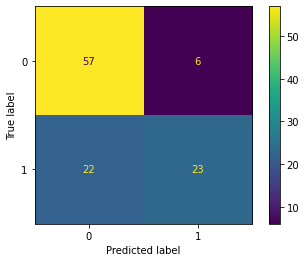

In [25]:
print('Confusion Matrix')
plot_confusion_matrix(logreg, X_test, y_test)

In [39]:
print("Training set accuracy score: {:.3f}".format(logreg.score(X_train,y_train)))
print("Testing set accuracy score: {:.3f}".format(logreg.score(X_test,y_test)))

Training set accuracy score: 0.789
Testing set accuracy score: 0.741


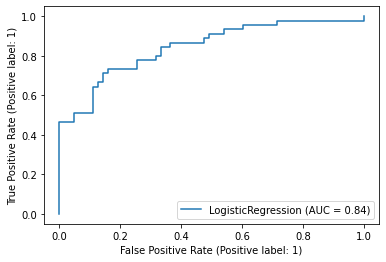

In [29]:
#plot a roc curve
plot_roc_curve(logreg, X_test, y_test)

In [30]:
# AUC (area under curve) is .84, which is good